In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [2]:
df=pd.read_csv("relationship_20_comments_EDA_clean.csv",sep=";")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110323 entries, 0 to 110322
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   author            110323 non-null  object
 1   body              110323 non-null  object
 2   controversiality  110323 non-null  bool  
 3   created_utc       110323 non-null  object
 4   distinguished     110323 non-null  bool  
 5   edited            110323 non-null  bool  
 6   gilded            110323 non-null  int64 
 7   id                110323 non-null  object
 8   link_id           110323 non-null  object
 9   parent_id         110323 non-null  object
 10  score             110323 non-null  int64 
 11  stickied          110323 non-null  bool  
 12  created_hour      110323 non-null  int64 
 13  created_day       110323 non-null  int64 
 14  created_year      110323 non-null  int64 
 15  clean_text        110323 non-null  object
 16  comment_len       110323 non-null  int

# Abkürzungen converten

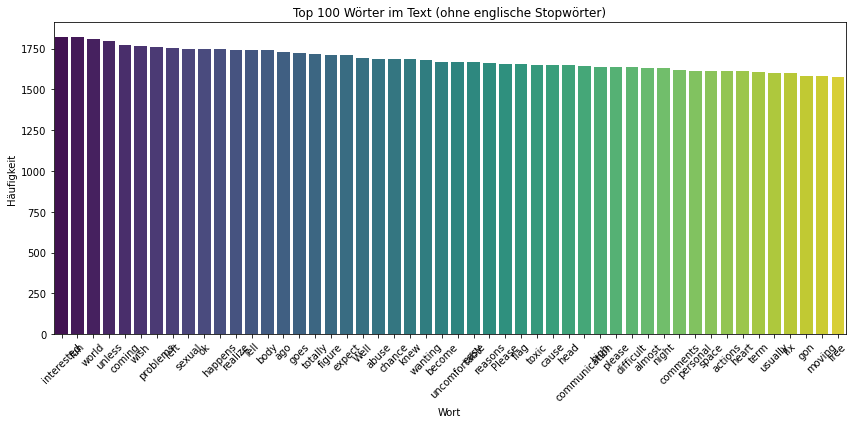

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from nltk.corpus import stopwords  # Importiere die Bibliothek für Stopwörter

# Annahme: Du hast bereits einen DataFrame 'df' mit einer Spalte 'body', die die Textdaten enthält.

# Lade die englischen Stopwörter aus NLTK
stopwords_english = set(stopwords.words('english'))

# Funktion zum Extrahieren und Zählen der Wörter unter Berücksichtigung der Stopwörter
def count_words(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stopwords_english]
    return filtered_words

# Erstelle ein neues DataFrame 'df_filtered_words'
df_filtered_words = df.copy()
df_filtered_words['filtered_words'] = df['clean_text'].apply(count_words)

# Extrahiere die Top 100 häufigsten Wörter
word_counter = Counter(word for words in df_filtered_words['filtered_words'] for word in words)
top_words = word_counter.most_common()[350:400]  # Hier werden die ersten 20 Wörter übersprungen

# Erstelle das Countplot
top_words_df = pd.DataFrame(top_words, columns=['Wort', 'Häufigkeit'])
plt.figure(figsize=(12, 6))
sns.barplot(y='Häufigkeit', x='Wort', data=top_words_df, palette='viridis')
plt.title('Top 100 Wörter im Text (ohne englische Stopwörter)')
plt.ylabel('Häufigkeit')
plt.xlabel('Wort')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [10]:
df['clean_text'] = df['clean_text'].str.replace('OP', 'Original Poster')
df['clean_text'] = df['clean_text'].str.replace('etc', 'et cetera')
df['clean_text'] = df['clean_text'].str.replace('bf', 'boy friend')
df['clean_text'] = df['clean_text'].str.replace('gf', 'girl friend')

# Sentiment Analyses

In [13]:
# Initialisieren des Sentiment-Analyzers
analyzer = SentimentIntensityAnalyzer()

# Funktion zur Berechnung des Sentiments und Erstellung der neuen Spalten
def get_sentiment_scores(text):
    sentiment = analyzer.polarity_scores(text)
    return sentiment
df['sentiment_scores'] = df["clean_text"].apply(get_sentiment_scores)

# Extrahieren und speichern Sie die Werte für positive, negative, neutrale Sentiments und den Compound-Wert
df['positive'] = df['sentiment_scores'].apply(lambda x: x['pos'])
df['negative'] = df['sentiment_scores'].apply(lambda x: x['neg'])
df['neutral'] = df['sentiment_scores'].apply(lambda x: x['neu'])
df['compound'] = df['sentiment_scores'].apply(lambda x: x['compound'])

In [14]:
df.describe()

,gilded,score,created_hour,created_day,created_year,comment_len,positive,negative,neutral,compound
count,110323.000000,110323.000000,110323.000000,110323.000000,110323.0,110323.000000,110323.000000,110323.000000,110323.000000,110323.000000
mean,0.000426,14.032650,12.688796,15.819312,2020.0,77.198889,0.131711,0.081206,0.787082,0.237064
std,0.023511,96.234399,7.123933,8.627573,0.0,86.184695,0.109258,0.082953,0.119771,0.605171
min,0.000000,-280.000000,0.000000,1.000000,2020.0,1.000000,0.000000,0.000000,0.000000,-0.999700
25%,0.000000,1.000000,6.000000,9.000000,2020.0,24.000000,0.061000,0.000000,0.726000,-0.250000
50%,0.000000,2.000000,14.000000,16.000000,2020.0,51.000000,0.117000,0.066000,0.795000,0.361200
75%,0.000000,6.000000,19.000000,23.000000,2020.0,99.000000,0.179000,0.120000,0.860000,0.801600
max,3.000000,7240.000000,23.000000,30.000000,2020.0,1994.000000,1.000000,1.000000,1.000000,0.999900


In [19]:
df["compound"].mean()

0.23706387335370205

In [15]:
import pandas as pd

# Annahme: Du hast bereits einen DataFrame 'df' mit einer Spalte 'compound', die die Compound-Werte enthält.

# Funktion zur Zuordnung des Sentiments basierend auf dem Compound-Wert
def get_sentiment(compound):
    if compound >= 0.05:
        return '1'
    elif compound > -0.05 and compound < 0.05:
        return '0'
    elif compound <= -0.05:
        return '-1'

# Erstelle die neue Spalte 'Sentiment' basierend auf der 'compound'-Spalte
df['Sentiment'] = df['compound'].apply(get_sentiment)

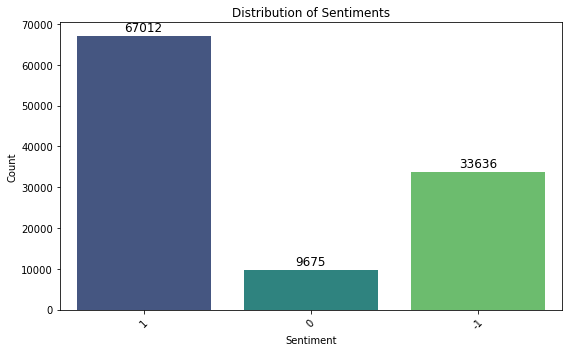

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming the 'Sentiment' column has already been created as described in the previous code.

# Create the Countplot for Sentiments
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='Sentiment', data=df, palette='viridis')
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Add the count above each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.tight_layout()
plt.show()

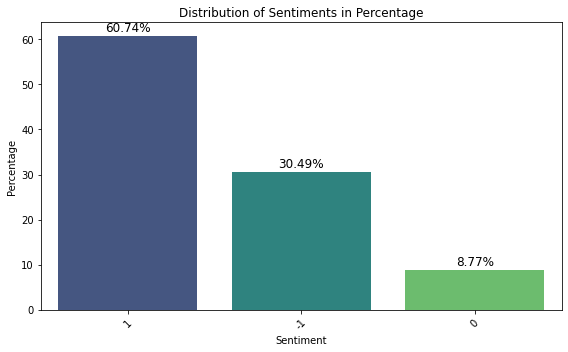

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming the 'Sentiment' column has already been created as described in the previous code.

# Calculate the percentage for each sentiment
sentiment_counts = df['Sentiment'].value_counts(normalize=True) * 100

# Create the bar plot for Sentiments in percentage
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')
plt.title('Distribution of Sentiments in Percentage')
plt.xlabel('Sentiment')
plt.ylabel('Percentage')
plt.xticks(rotation=45)

# Add the percentage above each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.tight_layout()
plt.show()

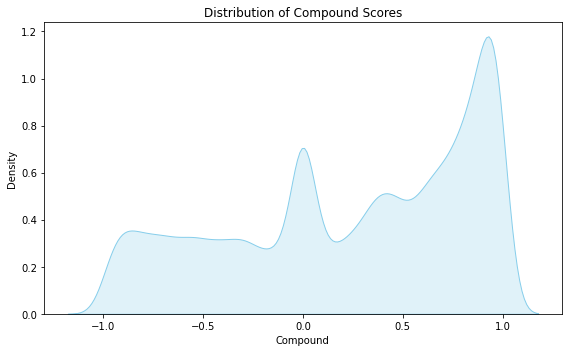

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the KDE plot for the 'compound' column
plt.figure(figsize=(8, 5))
sns.kdeplot(df['compound'], shade=True, color='skyblue')
plt.title('Distribution of Compound Scores')
plt.xlabel('Compound')
plt.ylabel('Density')
plt.tight_layout()
plt.show()

# Body

In [20]:
df_body=pd.read_csv("relationship_20_comments_EDA_clean.csv",sep=";")

In [21]:
df_body.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110323 entries, 0 to 110322
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   author            110323 non-null  object
 1   body              110323 non-null  object
 2   controversiality  110323 non-null  bool  
 3   created_utc       110323 non-null  object
 4   distinguished     110323 non-null  bool  
 5   edited            110323 non-null  bool  
 6   gilded            110323 non-null  int64 
 7   id                110323 non-null  object
 8   link_id           110323 non-null  object
 9   parent_id         110323 non-null  object
 10  score             110323 non-null  int64 
 11  stickied          110323 non-null  bool  
 12  created_hour      110323 non-null  int64 
 13  created_day       110323 non-null  int64 
 14  created_year      110323 non-null  int64 
 15  clean_text        110323 non-null  object
 16  comment_len       110323 non-null  int

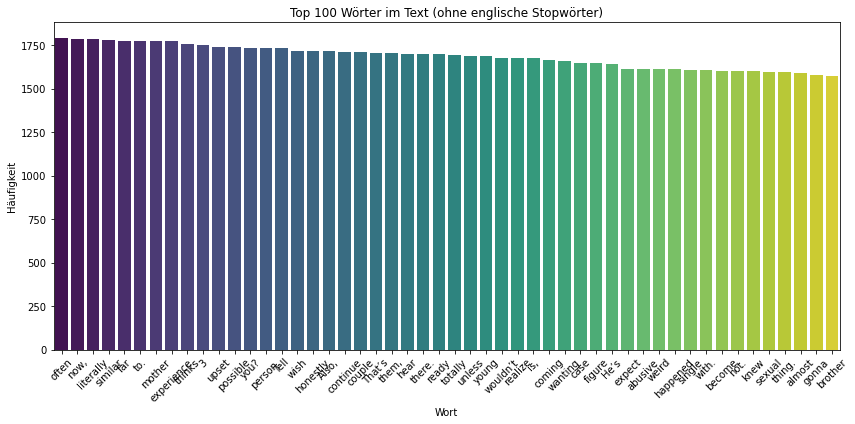

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from nltk.corpus import stopwords  # Importiere die Bibliothek für Stopwörter

# Annahme: Du hast bereits einen DataFrame 'df' mit einer Spalte 'body', die die Textdaten enthält.

# Lade die englischen Stopwörter aus NLTK
stopwords_english = set(stopwords.words('english'))

# Funktion zum Extrahieren und Zählen der Wörter unter Berücksichtigung der Stopwörter
def count_words(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stopwords_english]
    return filtered_words

# Erstelle ein neues DataFrame 'df_filtered_words'
df_filtered_words = df_body.copy()
df_filtered_words['filtered_words'] = df_body['body'].apply(count_words)

# Extrahiere die Top 100 häufigsten Wörter
word_counter = Counter(word for words in df_filtered_words['filtered_words'] for word in words)
top_words = word_counter.most_common()[350:400]  # Hier werden die ersten 20 Wörter übersprungen

# Erstelle das Countplot
top_words_df = pd.DataFrame(top_words, columns=['Wort', 'Häufigkeit'])
plt.figure(figsize=(12, 6))
sns.barplot(y='Häufigkeit', x='Wort', data=top_words_df, palette='viridis')
plt.title('Top 100 Wörter im Text (ohne englische Stopwörter)')
plt.ylabel('Häufigkeit')
plt.xlabel('Wort')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [31]:
df_body['body'] = df_body['body'].str.replace('OP', 'Original Poster')
df_body['body'] = df_body['body'].str.replace('bf', 'boy friend')
df_body['body'] = df_body['body'].str.replace('gf', 'girl friend')
df_body['body'] = df_body['body'].str.replace('etc.', 'et cetera')

/var/folders/88/lkbjvmyj48n6h04_m1x2v3km0000gn/T/ipykernel_93087/2096660593.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df_body['body'] = df_body['body'].str.replace('etc.', 'et cetera')


In [34]:
# Initialisieren des Sentiment-Analyzers
analyzer = SentimentIntensityAnalyzer()

# Funktion zur Berechnung des Sentiments und Erstellung der neuen Spalten
def get_sentiment_scores(text):
    sentiment = analyzer.polarity_scores(text)
    return sentiment
df_body['sentiment_scores'] = df_body["body"].apply(get_sentiment_scores)

# Extrahieren und speichern Sie die Werte für positive, negative, neutrale Sentiments und den Compound-Wert
df_body['positive'] = df_body['sentiment_scores'].apply(lambda x: x['pos'])
df_body['negative'] = df_body['sentiment_scores'].apply(lambda x: x['neg'])
df_body['neutral'] = df_body['sentiment_scores'].apply(lambda x: x['neu'])
df_body['compound'] = df_body['sentiment_scores'].apply(lambda x: x['compound'])

In [35]:
df_body.describe()

,gilded,score,created_hour,created_day,created_year,comment_len,positive,negative,neutral,compound
count,110323.000000,110323.000000,110323.000000,110323.000000,110323.0,110323.000000,110323.000000,110323.000000,110323.000000,110323.000000
mean,0.000426,14.032650,12.688796,15.819312,2020.0,77.198889,0.137309,0.089216,0.773476,0.210167
std,0.023511,96.234399,7.123933,8.627573,0.0,86.184695,0.117196,0.090565,0.128956,0.609934
min,0.000000,-280.000000,0.000000,1.000000,2020.0,1.000000,0.000000,0.000000,0.000000,-0.999600
25%,0.000000,1.000000,6.000000,9.000000,2020.0,24.000000,0.061000,0.000000,0.708000,-0.296000
50%,0.000000,2.000000,14.000000,16.000000,2020.0,51.000000,0.121000,0.073000,0.783000,0.325200
75%,0.000000,6.000000,19.000000,23.000000,2020.0,99.000000,0.187000,0.131000,0.852000,0.780300
max,3.000000,7240.000000,23.000000,30.000000,2020.0,1994.000000,1.000000,1.000000,1.000000,0.999900


In [40]:
df_body["compound"].mean()

0.21016672316743004

In [36]:
import pandas as pd

# Annahme: Du hast bereits einen DataFrame 'df' mit einer Spalte 'compound', die die Compound-Werte enthält.

# Funktion zur Zuordnung des Sentiments basierend auf dem Compound-Wert
def get_sentiment(compound):
    if compound >= 0.05:
        return '1'
    elif compound > -0.05 and compound < 0.05:
        return '0'
    elif compound <= -0.05:
        return '-1'

# Erstelle die neue Spalte 'Sentiment' basierend auf der 'compound'-Spalte
df_body['Sentiment'] = df_body['compound'].apply(get_sentiment)

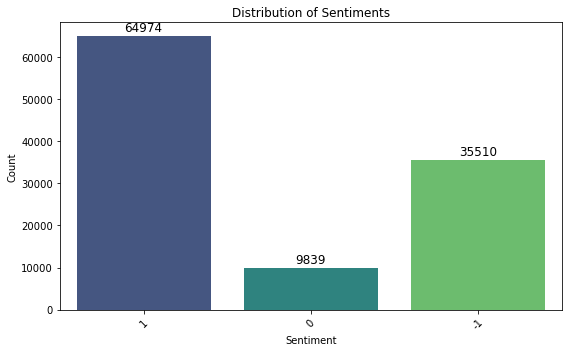

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming the 'Sentiment' column has already been created as described in the previous code.

# Create the Countplot for Sentiments
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='Sentiment', data=df_body, palette='viridis')
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Add the count above each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.tight_layout()
plt.show()

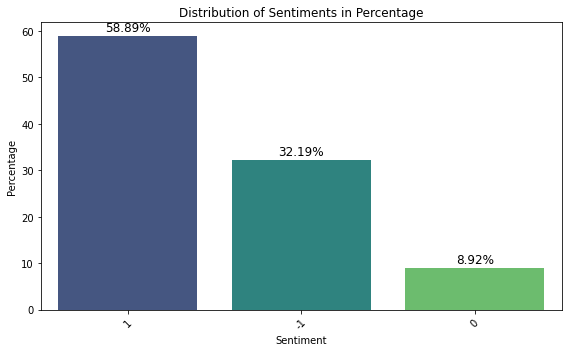

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming the 'Sentiment' column has already been created as described in the previous code.

# Calculate the percentage for each sentiment
sentiment_counts = df_body['Sentiment'].value_counts(normalize=True) * 100

# Create the bar plot for Sentiments in percentage
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')
plt.title('Distribution of Sentiments in Percentage')
plt.xlabel('Sentiment')
plt.ylabel('Percentage')
plt.xticks(rotation=45)

# Add the percentage above each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.tight_layout()
plt.show()

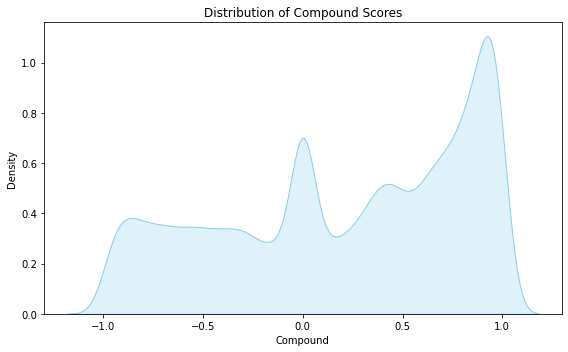

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the KDE plot for the 'compound' column
plt.figure(figsize=(8, 5))
sns.kdeplot(df_body['compound'], shade=True, color='skyblue')
plt.title('Distribution of Compound Scores')
plt.xlabel('Compound')
plt.ylabel('Density')
plt.tight_layout()
plt.show()